In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
df = pd.DataFrame({
  'x': [12,13,14,15,16,17,18,19],
  'y': [20,21,22,23,24,25,26,27]
})

np.random.seed(200)
k=3
centroids={
    i+1: [np.random.randint(0,80),np.random.randint(0,80)]
  for i in range(k)
}

In [9]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [10]:
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2 +
                (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    # colmap is not defined in the function, assuming it's a global variable
    # For this example, let's define it inside or pass it as an argument
    colmap = {1: 'r', 2: 'g', 3: 'b'}
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

# To test the function
df = assignment(df, centroids)
print(df.head())

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  20        14.560220        60.166436        70.604532        1     r
1  13  21        13.928388        58.872744        69.202601        1     r
2  14  22        13.416408        57.584720        67.801180        1     r
3  15  23        13.038405        56.302753        66.400301        1     r
4  16  24        12.806248        55.027266        65.000000        1     r


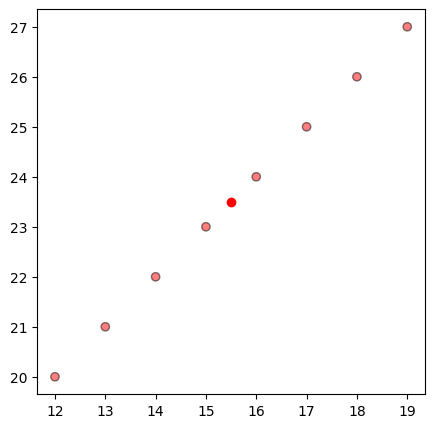

In [12]:
import copy

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

old_centroids = copy.deepcopy(centroids)
centroids = update(centroids)

# Plotting
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
    plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])

plt.show()